In [4]:
import sklearn
import pandas as pd
import numpy as np

In [5]:
from pandas import read_csv as read
from sklearn import preprocessing as prep

In [43]:
import pandas as pd

path = "winequality-white.csv"

dataset = read(path, sep = ";")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


In [44]:
dataset.tail()     

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [45]:
dataset.head()  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [46]:
 dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
dataset = dataset.dropna()

In [48]:
quality = dataset.pop('quality')

In [49]:
dataset['bad'] = (quality == 0)*1.0
dataset['bad'] = (quality == 1)*1.0
dataset['bad'] = (quality == 2)*1.0
dataset['bad'] = (quality == 3)*1.0
dataset['good'] = (quality == 4)*1.0
dataset['good'] = (quality == 5)*1.0
dataset['good'] = (quality == 6)*1.0
dataset['good'] = (quality == 7)*1.0
dataset['very good'] = (quality == 8)*1.0
dataset['very good'] = (quality == 9)*1.0
dataset['very good'] = (quality == 10)*1.0
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bad,good,very good
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0.0,0.0,0.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.0,0.0,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0.0,0.0,0.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0.0,1.0,0.0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,0.0,0.0,0.0


In [50]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


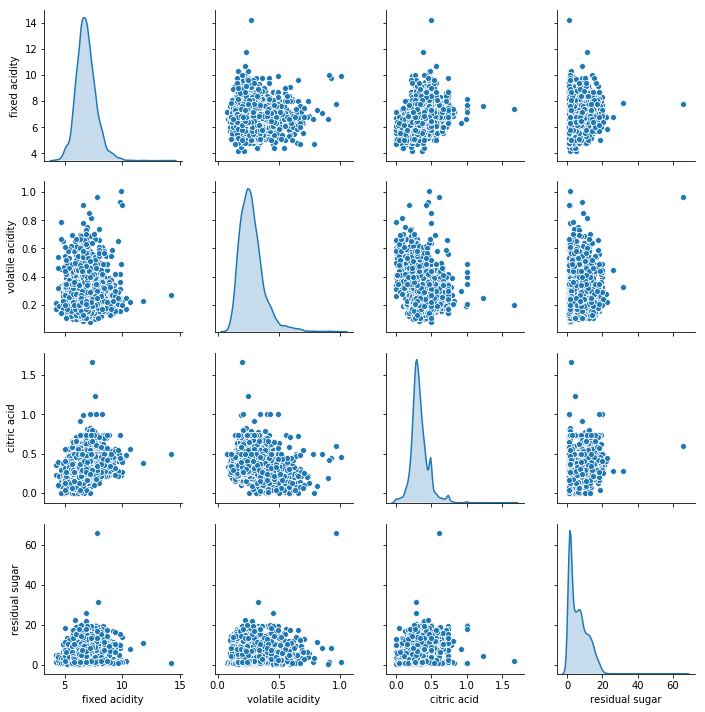

In [69]:
%matplotlib inline
import seaborn as sns

pl = sns.pairplot(train_dataset[["fixed acidity",
                                 "volatile acidity",
                                 "citric acid",
                                 "residual sugar"]], diag_kind="kde")

pl.savefig("pairplot.png") #сохраним объект в png-файл в директорию со скриптом

In [52]:
train_dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bad,good,very good
fixed acidity,1.000000,-0.014780,0.289079,0.081491,0.014052,-0.049138,0.086407,0.261205,-0.427837,-0.015899,-0.120768,0.064924,-0.070388,NaN
volatile acidity,-0.014780,1.000000,-0.140113,0.074883,0.052553,-0.076503,0.094047,0.033358,-0.039681,-0.046229,0.076935,0.030018,-0.072688,NaN
citric acid,0.289079,-0.140113,1.000000,0.100780,0.101667,0.094515,0.122896,0.156613,-0.155956,0.057078,-0.076968,-0.002870,-0.030715,NaN
residual sugar,0.081491,0.074883,0.100780,1.000000,0.080352,0.300674,0.398696,0.835778,-0.183561,-0.026476,-0.439232,-0.008993,-0.103522,NaN
chlorides,0.014052,0.052553,0.101667,0.080352,1.000000,0.122104,0.197190,0.246477,-0.085200,0.005334,-0.352071,-0.002435,-0.161037,NaN
free sulfur dioxide,-0.049138,-0.076503,0.094515,0.300674,0.122104,1.000000,0.626501,0.303138,0.002397,0.049243,-0.261866,0.086461,-0.043452,NaN
total sulfur dioxide,0.086407,0.094047,0.122896,0.398696,0.197190,0.626501,1.000000,0.526626,0.007197,0.134351,-0.444191,0.052657,-0.147022,NaN
density,0.261205,0.033358,0.156613,0.835778,0.246477,0.303138,0.526626,1.000000,-0.082899,0.082386,-0.773146,0.016019,-0.242859,NaN
pH,-0.427837,-0.039681,-0.155956,-0.183561,-0.085200,0.002397,0.007197,-0.082899,1.000000,0.169625,0.113898,0.008068,0.072722,NaN
sulphates,-0.015899,-0.046229,0.057078,-0.026476,0.005334,0.049243,0.134351,0.082386,0.169625,1.000000,-0.028821,-0.013770,0.053325,NaN


Примеры построения гистограммы распределения параметров

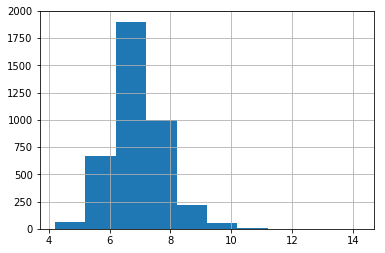

In [58]:
train_dataset['fixed acidity'].hist()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


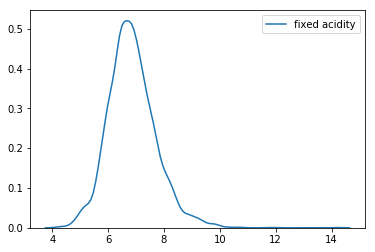

In [55]:
sns.kdeplot(train_dataset['fixed acidity'])

In [59]:
[i for i in dataset.columns]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'bad',
 'good',
 'very good']

                            OLS Regression Results                            
Dep. Variable:          fixed acidity   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     694.2
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        14:05:59   Log-Likelihood:                -3680.8
No. Observations:                4898   AIC:                             7388.
Df Residuals:                    4885   BIC:                             7472.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -627.6463 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


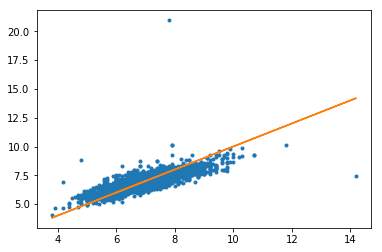

In [61]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

X = dataset[['volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'bad',
 'good',
 'very good']]

Y = dataset['fixed acidity']
# with statsmodels
X = sm.add_constant(X) # adding a constant

 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
plt.plot(Y,predictions,'.',Y,Y,'-')

In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import regression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20) 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=2000)  
mlp.fit(X_train, y_train.values.ravel())

predictions = mlp.predict(X_test)
print(regression.mean_squared_error(y_test, predictions))
print(regression.r2_score(y_test, predictions))

0.203602838551602
0.7146052484202616


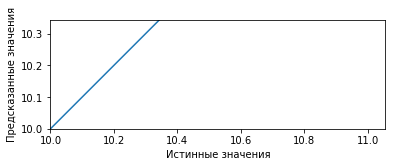

In [63]:
plt.scatter(y_test, predictions)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,plt.xlim()[1]])
plt.ylim([10,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


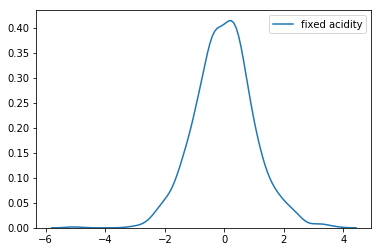

In [64]:
losses = y_test - predictions
losses = (losses - losses.mean()) / losses.std()
sns.kdeplot(losses)

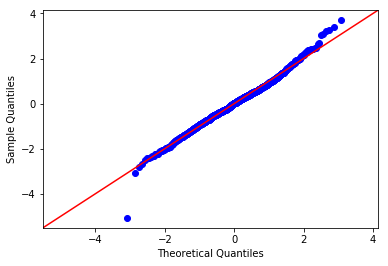

In [65]:
import statsmodels.api as sm

sm.qqplot(losses, line = '45')
plt.show()

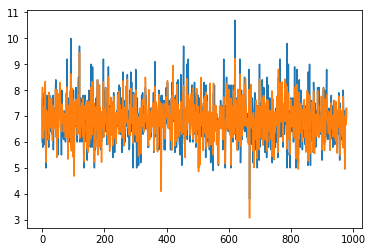

In [66]:
plt.plot(range(len(y_test)),y_test,range(len(predictions)), predictions)